In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/kaggle/input/mnist-train/mnist_train.csv')

In [3]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # Shuffle before splitting into dev and training sets

data_dev = data[0:1000].T # Transpose rows and columns
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T # Transpose rows and columns
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train /255.  
_, m_train = X_train.shape

In [5]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def deriv_ReLU(Z):
    # True --> 1, False --> 0
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2
    
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1 
    one_hot_Y = one_hot_Y.T # Transpose 
    return one_hot_Y
    
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    # m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 -  alpha * dW1
    b1 = b1 -  alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [6]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [7]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 600)

Iteration:  0
[7 7 7 ... 3 7 7] [3 7 4 ... 4 1 9]
Accuracy:  0.12135593220338983
Iteration:  10
[2 7 9 ... 4 8 7] [3 7 4 ... 4 1 9]
Accuracy:  0.24738983050847457
Iteration:  20
[2 7 9 ... 4 8 7] [3 7 4 ... 4 1 9]
Accuracy:  0.3132033898305085
Iteration:  30
[2 7 9 ... 4 1 7] [3 7 4 ... 4 1 9]
Accuracy:  0.3712542372881356
Iteration:  40
[2 7 9 ... 4 1 9] [3 7 4 ... 4 1 9]
Accuracy:  0.4322881355932203
Iteration:  50
[2 7 9 ... 4 1 9] [3 7 4 ... 4 1 9]
Accuracy:  0.49030508474576273
Iteration:  60
[3 7 9 ... 4 1 9] [3 7 4 ... 4 1 9]
Accuracy:  0.534135593220339
Iteration:  70
[3 7 9 ... 4 1 9] [3 7 4 ... 4 1 9]
Accuracy:  0.5683389830508475
Iteration:  80
[3 7 9 ... 4 1 9] [3 7 4 ... 4 1 9]
Accuracy:  0.5950847457627119
Iteration:  90
[3 7 9 ... 4 1 9] [3 7 4 ... 4 1 9]
Accuracy:  0.6198474576271187
Iteration:  100
[3 7 9 ... 4 1 9] [3 7 4 ... 4 1 9]
Accuracy:  0.6407457627118645
Iteration:  110
[3 7 9 ... 4 1 9] [3 7 4 ... 4 1 9]
Accuracy:  0.6596440677966102
Iteration:  120
[3 7 9 ..

In [8]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_predictions(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


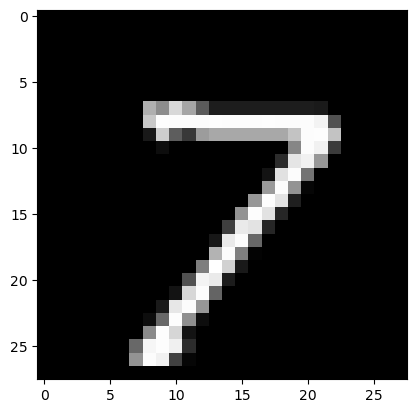

In [9]:
test_predictions(101, W1, b1, W2, b2)

In [10]:
# Checking cross-validation accuracy
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[7 8 5 4 0 9 6 3 8 1 0 1 7 1 0 6 6 4 3 9 1 6 9 0 4 6 5 2 1 1 1 9 2 6 1 8 8
 9 6 1 4 9 6 3 3 3 9 7 1 9 0 2 0 8 4 3 0 9 1 6 6 7 7 9 0 6 8 2 1 3 5 8 4 1
 4 4 9 9 8 3 9 3 1 6 9 1 8 6 8 9 3 3 6 6 4 2 7 5 3 7 6 0 5 3 4 8 2 4 3 1 9
 1 3 7 3 1 1 7 4 5 8 1 4 2 2 3 3 7 8 1 7 3 0 1 5 9 8 6 2 6 9 0 8 0 9 4 2 1
 3 2 7 1 9 5 1 5 8 0 8 0 4 0 9 8 1 5 0 6 3 9 4 2 5 6 6 8 0 4 9 4 1 8 0 8 6
 7 7 8 2 1 8 2 2 7 1 1 9 4 9 9 1 6 0 5 4 5 8 0 5 9 3 2 2 9 2 1 3 0 7 2 2 9
 5 8 9 0 5 1 2 1 5 7 0 6 8 4 5 3 0 1 1 0 9 4 5 3 3 7 4 9 1 4 5 3 3 4 9 4 8
 2 6 7 6 0 4 5 5 9 4 5 0 0 2 2 7 8 2 4 7 3 5 3 5 1 8 1 6 4 8 4 3 4 4 9 5 9
 4 2 8 7 8 4 8 5 4 9 2 6 9 1 0 5 9 0 3 1 5 6 4 1 4 5 9 6 6 4 7 0 7 0 4 5 9
 4 1 9 4 0 6 3 6 7 5 8 6 1 5 4 3 4 1 9 0 0 7 0 6 7 8 9 4 5 8 7 2 1 0 0 9 0
 5 9 5 8 9 2 2 1 3 3 3 2 9 5 1 9 4 5 8 6 4 4 2 9 4 9 0 1 3 1 3 3 3 5 9 2 6
 9 2 1 3 2 0 4 8 6 3 5 9 4 9 2 5 9 1 8 2 1 9 5 3 2 6 4 8 5 3 2 0 0 2 2 4 2
 0 9 8 2 0 4 3 5 8 4 9 9 4 6 8 7 7 7 0 1 6 8 9 5 1 1 6 5 6 6 3 1 3 7 7 7 1
 0 1 0 9 5 3 6 4 8 0 4 6 

0.868